In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML 
import seaborn as sns


In [3]:
train_file = "train.csv"
test_file = "test.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)


In [4]:
print("X_train shape: ", df_train.shape)
print("X_test shape: ", df_test.shape)


X_train shape:  (8400, 11)
X_test shape:  (3600, 11)


In [5]:
df_train.head()


,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,8.326177,0.973785,0.998666,0.084932,0.123022,0.707818,0.996906,0.149736,0.389905,0.691138,0.395178
1,14.848367,0.594336,0.611940,0.180189,0.153344,0.620311,0.793185,0.394348,0.115266,0.393585,0.752754
2,22.795850,0.927057,0.629549,0.874648,0.674775,0.937591,0.615097,0.782452,0.929821,0.011638,0.213458
3,17.160788,0.712305,0.558093,0.368896,0.396511,0.655437,0.187476,0.378300,0.408392,0.723682,0.446005
4,15.937745,0.846342,0.975794,0.171361,0.335325,0.603335,0.493966,0.869233,0.364646,0.587510,0.287274


In [6]:
# Find missing value in training set
print("Missing value in training set:")
print(df_train.isnull().sum())
print("Missing value in test set:")
print(df_test.isnull().sum())


Missing value in training set:
y        0
X1     141
X2     175
X3     154
X4     172
X5     171
X6     170
X7     152
X8     173
X9     188
X10    170
dtype: int64
Missing value in test set:
y       0
X1     72
X2     70
X3     55
X4     86
X5     97
X6     71
X7     78
X8     68
X9     68
X10    69
dtype: int64


In [21]:
# # Remove missing values in training data
df_train_nona = df_train.dropna()
df_test_nona = df_test.dropna()


In [22]:
print("X_train shape: ", df_train_nona.shape)
print("X_test shape: ", df_test_nona.shape)


X_train shape:  (6734, 11)
X_test shape:  (2866, 11)


In [9]:
y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:,0]

X_train = df_train.iloc[:,1:]
X_test = df_test.iloc[:,1:]


In [23]:
y_train_nona = df_train_nona.iloc[:,0]
y_test_nona = df_test_nona.iloc[:,0]

X_train_nona = df_train_nona.iloc[:,1:]
X_test_nona = df_test_nona.iloc[:,1:]


<Axes: xlabel='y', ylabel='Count'>

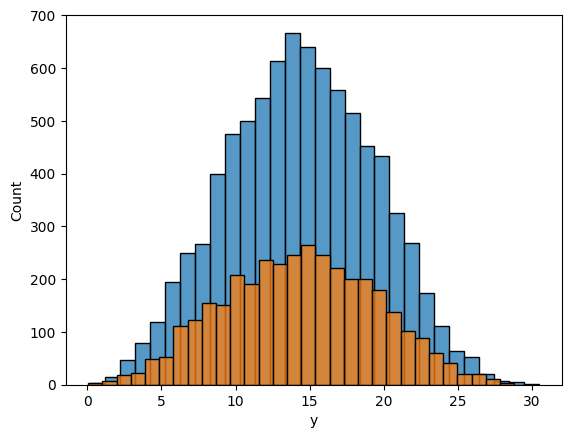

In [10]:
sns.histplot(y_train, bins = 30)
sns.histplot(y_test, bins = 30)


***Uczenie modeli***

*Regresja liniowa*

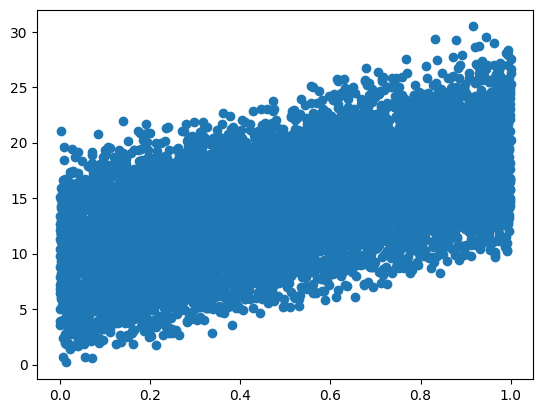

In [11]:
col = 3
X_train_onecol = pd.DataFrame(X_train.iloc[:,col]).dropna()
y_train_onecol = y_train[X_train_onecol.index]
plt.scatter(X_train_onecol, y_train_onecol)


In [12]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_onecol, y_train_onecol)


LinearRegression()

In [13]:
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [10.00289345]


(array([801., 791., 807., 875., 848., 816., 815., 791., 834., 850.]),
 array([ 9.35134089, 10.35142071, 11.35150054, 12.35158036, 13.35166019,
        14.35174001, 15.35181984, 16.35189966, 17.35197948, 18.35205931,
        19.35213913]),
 <BarContainer object of 10 artists>)

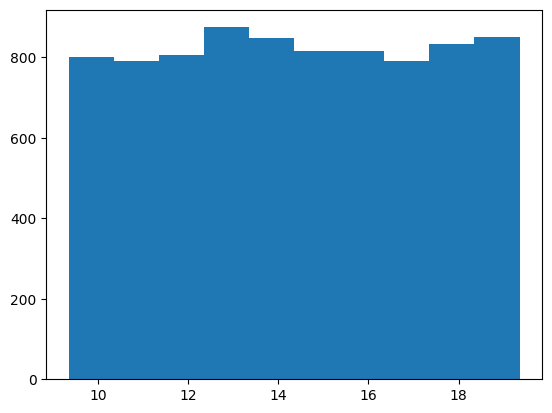

In [19]:
X_test_onecol = pd.DataFrame(X_test.iloc[:,col]).dropna()

pred_y = regr.predict(pd.DataFrame(X_train_onecol))
plt.hist(pred_y)


In [24]:
regr_multi = LinearRegression()
regr_multi.fit(X_train_nona, y_train_nona)
print('Coeffifients:', regr_multi.coef_)
print('Intercept:', regr_multi.intercept_)


Coeffifients: [ 6.87440710e+00  6.82169677e+00 -4.61166406e-02  1.00011970e+01
  5.09110493e+00 -2.35971250e-03 -1.58085111e-01 -7.60022116e-02
  4.65040662e-02 -2.16668021e-03]
Intercept: 0.13806988570263456


(array([  7.,  16.,  14.,  32.,  38.,  73.,  90., 110., 123., 142., 145.,
        167., 202., 160., 212., 194., 189., 164., 156., 159., 125.,  96.,
         73.,  64.,  49.,  27.,  16.,  13.,   7.,   3.]),
 array([ 0.94852962,  1.87655272,  2.80457582,  3.73259892,  4.66062203,
         5.58864513,  6.51666823,  7.44469133,  8.37271443,  9.30073753,
        10.22876063, 11.15678374, 12.08480684, 13.01282994, 13.94085304,
        14.86887614, 15.79689924, 16.72492234, 17.65294544, 18.58096855,
        19.50899165, 20.43701475, 21.36503785, 22.29306095, 23.22108405,
        24.14910715, 25.07713025, 26.00515336, 26.93317646, 27.86119956,
        28.78922266]),
 <BarContainer object of 30 artists>)

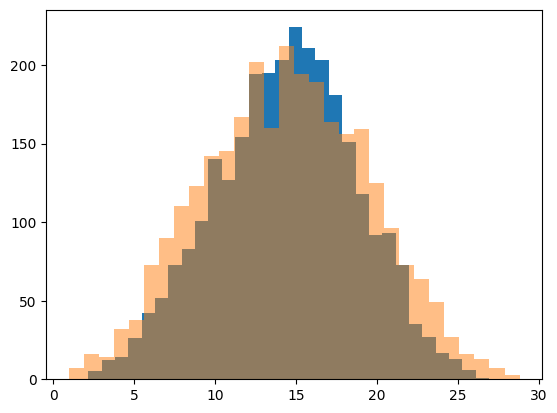

In [30]:
y_pred_multi = regr_multi.predict(X_test_nona)
plt.hist(y_pred_multi, bins=30)
plt.hist(y_test_nona, bins=30, alpha=0.5)


*Gradient boosting regression*

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

regr_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
regr_gb.fit(X_train_nona, y_train_nona)


GradientBoostingRegressor(max_depth=1, random_state=0)

(array([  7.,  16.,  14.,  32.,  38.,  73.,  90., 110., 123., 142., 145.,
        167., 202., 160., 212., 194., 189., 164., 156., 159., 125.,  96.,
         73.,  64.,  49.,  27.,  16.,  13.,   7.,   3.]),
 array([ 0.94852962,  1.87655272,  2.80457582,  3.73259892,  4.66062203,
         5.58864513,  6.51666823,  7.44469133,  8.37271443,  9.30073753,
        10.22876063, 11.15678374, 12.08480684, 13.01282994, 13.94085304,
        14.86887614, 15.79689924, 16.72492234, 17.65294544, 18.58096855,
        19.50899165, 20.43701475, 21.36503785, 22.29306095, 23.22108405,
        24.14910715, 25.07713025, 26.00515336, 26.93317646, 27.86119956,
        28.78922266]),
 <BarContainer object of 30 artists>)

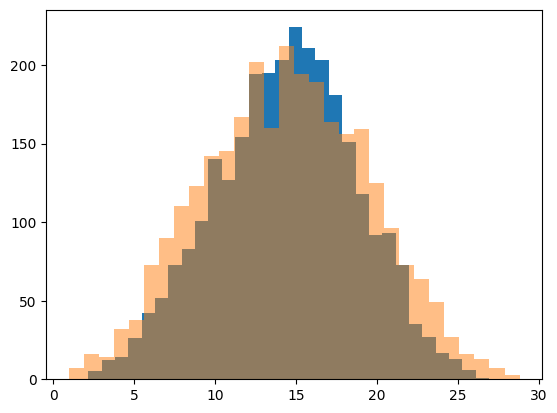

In [36]:
y_pred_regr_gb = regr_gb.predict(X_test_nona)
plt.hist(y_pred_multi, bins=30)
plt.hist(y_test_nona, bins=30, alpha=0.5)


*Elastic net*

In [44]:
from sklearn.linear_model import ElasticNet

regr_elastic = ElasticNet(random_state=0, alpha=0.1, l1_ratio=0.8)
regr_elastic.fit(X_train_nona, y_train_nona)


ElasticNet(alpha=0.1, l1_ratio=0.8, random_state=0)

(array([  7.,  16.,  14.,  32.,  38.,  73.,  90., 110., 123., 142., 145.,
        167., 202., 160., 212., 194., 189., 164., 156., 159., 125.,  96.,
         73.,  64.,  49.,  27.,  16.,  13.,   7.,   3.]),
 array([ 0.94852962,  1.87655272,  2.80457582,  3.73259892,  4.66062203,
         5.58864513,  6.51666823,  7.44469133,  8.37271443,  9.30073753,
        10.22876063, 11.15678374, 12.08480684, 13.01282994, 13.94085304,
        14.86887614, 15.79689924, 16.72492234, 17.65294544, 18.58096855,
        19.50899165, 20.43701475, 21.36503785, 22.29306095, 23.22108405,
        24.14910715, 25.07713025, 26.00515336, 26.93317646, 27.86119956,
        28.78922266]),
 <BarContainer object of 30 artists>)

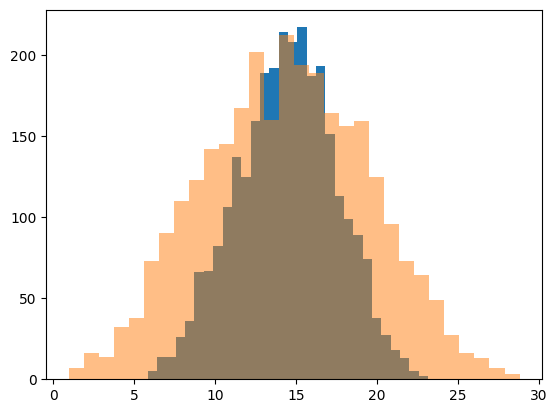

In [45]:
y_pred_elastic = regr_elastic.predict(X_test_nona)

plt.hist(y_pred_elastic, bins=30)
plt.hist(y_test_nona, bins=30, alpha=0.5)


*SGD regressor*

In [46]:
from sklearn.linear_model import SGDRegressor

regr_sgd = SGDRegressor(max_iter=1000, tol=1e-3)
regr_sgd.fit(X_train_nona, y_train_nona)


SGDRegressor()

(array([  7.,  16.,  14.,  32.,  38.,  73.,  90., 110., 123., 142., 145.,
        167., 202., 160., 212., 194., 189., 164., 156., 159., 125.,  96.,
         73.,  64.,  49.,  27.,  16.,  13.,   7.,   3.]),
 array([ 0.94852962,  1.87655272,  2.80457582,  3.73259892,  4.66062203,
         5.58864513,  6.51666823,  7.44469133,  8.37271443,  9.30073753,
        10.22876063, 11.15678374, 12.08480684, 13.01282994, 13.94085304,
        14.86887614, 15.79689924, 16.72492234, 17.65294544, 18.58096855,
        19.50899165, 20.43701475, 21.36503785, 22.29306095, 23.22108405,
        24.14910715, 25.07713025, 26.00515336, 26.93317646, 27.86119956,
        28.78922266]),
 <BarContainer object of 30 artists>)

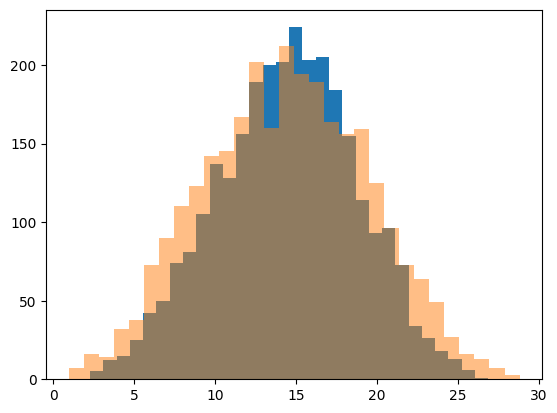

In [47]:
y_pred_sdg = regr_sgd.predict(X_test_nona)

plt.hist(y_pred_sdg, bins=30)
plt.hist(y_test_nona, bins=30, alpha=0.5)


*Support vector machine*

In [48]:
from sklearn.svm import SVR

regr_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
regr_svr.fit(X_train_nona, y_train_nona)


SVR(C=100, gamma=0.1)

(array([  7.,  16.,  14.,  32.,  38.,  73.,  90., 110., 123., 142., 145.,
        167., 202., 160., 212., 194., 189., 164., 156., 159., 125.,  96.,
         73.,  64.,  49.,  27.,  16.,  13.,   7.,   3.]),
 array([ 0.94852962,  1.87655272,  2.80457582,  3.73259892,  4.66062203,
         5.58864513,  6.51666823,  7.44469133,  8.37271443,  9.30073753,
        10.22876063, 11.15678374, 12.08480684, 13.01282994, 13.94085304,
        14.86887614, 15.79689924, 16.72492234, 17.65294544, 18.58096855,
        19.50899165, 20.43701475, 21.36503785, 22.29306095, 23.22108405,
        24.14910715, 25.07713025, 26.00515336, 26.93317646, 27.86119956,
        28.78922266]),
 <BarContainer object of 30 artists>)

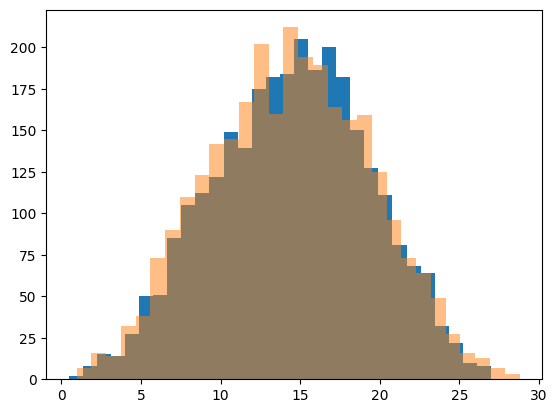

In [49]:
y_pred_svr = regr_svr.predict(X_test_nona)

plt.hist(y_pred_svr, bins=30)
plt.hist(y_test_nona, bins=30, alpha=0.5)


*Bayessian ridge*

In [50]:
from sklearn.linear_model import BayesianRidge

regr_bayes = BayesianRidge()
regr_bayes.fit(X_train_nona, y_train_nona)


BayesianRidge()

(array([  7.,  16.,  14.,  32.,  38.,  73.,  90., 110., 123., 142., 145.,
        167., 202., 160., 212., 194., 189., 164., 156., 159., 125.,  96.,
         73.,  64.,  49.,  27.,  16.,  13.,   7.,   3.]),
 array([ 0.94852962,  1.87655272,  2.80457582,  3.73259892,  4.66062203,
         5.58864513,  6.51666823,  7.44469133,  8.37271443,  9.30073753,
        10.22876063, 11.15678374, 12.08480684, 13.01282994, 13.94085304,
        14.86887614, 15.79689924, 16.72492234, 17.65294544, 18.58096855,
        19.50899165, 20.43701475, 21.36503785, 22.29306095, 23.22108405,
        24.14910715, 25.07713025, 26.00515336, 26.93317646, 27.86119956,
        28.78922266]),
 <BarContainer object of 30 artists>)

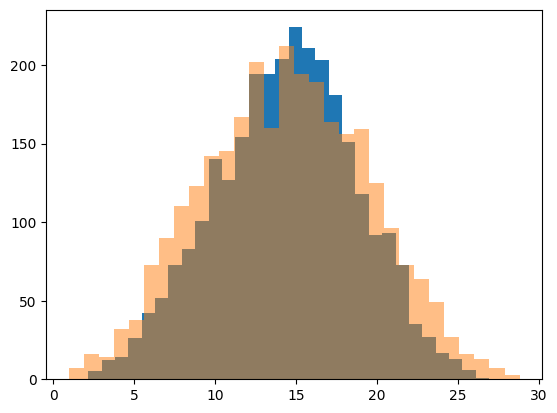

In [51]:
y_pred_bayes = regr_bayes.predict(X_test_nona)

plt.hist(y_pred_bayes, bins=30)
plt.hist(y_test_nona, bins=30, alpha=0.5)


*XG Boost Regression*

In [56]:
from xgboost.sklearn import XGBRegressor

regr_xgb = XGBRegressor()
regr_xgb.fit(X_train_nona, y_train_nona)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

(array([  7.,  16.,  14.,  32.,  38.,  73.,  90., 110., 123., 142., 145.,
        167., 202., 160., 212., 194., 189., 164., 156., 159., 125.,  96.,
         73.,  64.,  49.,  27.,  16.,  13.,   7.,   3.]),
 array([ 0.94852962,  1.87655272,  2.80457582,  3.73259892,  4.66062203,
         5.58864513,  6.51666823,  7.44469133,  8.37271443,  9.30073753,
        10.22876063, 11.15678374, 12.08480684, 13.01282994, 13.94085304,
        14.86887614, 15.79689924, 16.72492234, 17.65294544, 18.58096855,
        19.50899165, 20.43701475, 21.36503785, 22.29306095, 23.22108405,
        24.14910715, 25.07713025, 26.00515336, 26.93317646, 27.86119956,
        28.78922266]),
 <BarContainer object of 30 artists>)

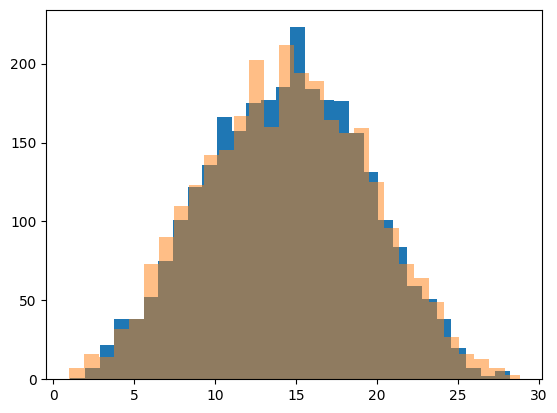

In [57]:
y_pred_xgb = regr_xgb.predict(X_test_nona)

plt.hist(y_pred_xgb, bins=30)
plt.hist(y_test_nona, bins=30, alpha=0.5)


*LGBM regression*

In [54]:
from lightgbm import LGBMRegressor

regr_lgb = LGBMRegressor()
regr_lgb.fit(X_train_nona, y_train_nona)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 6734, number of used features: 10
[LightGBM] [Info] Start training from score 14.376062


LGBMRegressor()

(array([  7.,  16.,  14.,  32.,  38.,  73.,  90., 110., 123., 142., 145.,
        167., 202., 160., 212., 194., 189., 164., 156., 159., 125.,  96.,
         73.,  64.,  49.,  27.,  16.,  13.,   7.,   3.]),
 array([ 0.94852962,  1.87655272,  2.80457582,  3.73259892,  4.66062203,
         5.58864513,  6.51666823,  7.44469133,  8.37271443,  9.30073753,
        10.22876063, 11.15678374, 12.08480684, 13.01282994, 13.94085304,
        14.86887614, 15.79689924, 16.72492234, 17.65294544, 18.58096855,
        19.50899165, 20.43701475, 21.36503785, 22.29306095, 23.22108405,
        24.14910715, 25.07713025, 26.00515336, 26.93317646, 27.86119956,
        28.78922266]),
 <BarContainer object of 30 artists>)

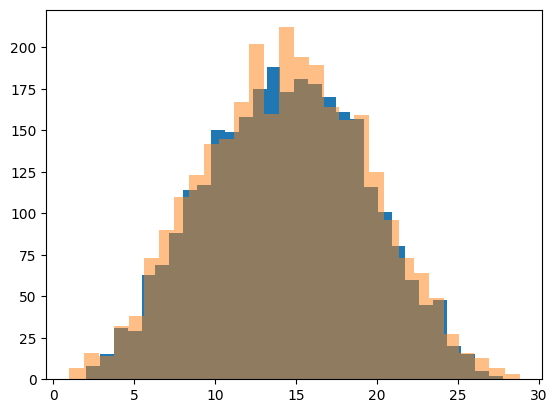

In [55]:
y_pred_lgb = regr_lgb.predict(X_test_nona)

plt.hist(y_pred_lgb, bins=30)
plt.hist(y_test_nona, bins=30, alpha=0.5)
